# Decision Tree
***
 결정트리는 ML 알고리즘 중에서 제일 이해하기 쉬운 알고리즘입니다. 개인적으로는 스무고개(?)의 느낌이 나는 기법이라고 생각하는데요. 나무의 가지치기를 반영한 기법입니다. 일반적으로 if / else를 기반으로 규칙을 나타나내는데 데이터의 어떤 기준을 바탕으로 규칙을 만들어야 가장 효율적인 분류가 될 것인가에 따라 모델의 성능이 좌우된다고 할 수 있습니다.
 
 아래 그림을 살펴보도록 하죠. 가장 상단에 있는 "Age over 30?"는 가장 상단에 있는 규칙 노드로서 데이터를 처음으로 분할하게 되는 기준을 의미합니다. 그리고 이 기준을 바탕으로 나누어진 2개의 데이터(Yes or No)를 다른 기준 "Salary over $2500?"와 "No.of children < 2 ?"로 분할하게 됩니다.
 
 이렇듯 결정트리는 데이터가 가지고 있는 변수를 기준으로 데이터를 계속 분할하느 작업을 거치게 됩니다.
 
![dt](dt.png)   
 출처 : https://eloquentarduino.github.io/2020/10/decision-tree-random-forest-and-xgboost-on-arduino/

 결정트리 알고리즘은 데이터를 균일하게 나누기 위한 규칙을 생성하는데 이러한 균일도를 측정하는 방법은 정보이득지수(Information Gain)와 지니계수가 있습니다.
 
 먼저 정보이득은 엔트로피를 기반으로 계산되는데 엔트로피는 데이터의 혼잡도를 의미합니다. 서로 다른 데이터가 섞여 있을수록 엔트로피는 높아지게 됩니다. 정보이득지수는 1에서 엔트로피 지수를 뺸 값입니다. 즉 정보 이득이 높아지는 기준으로 데이터를 분할하게 됩니다. 
 
 지니계수는 경제학에서 불평등 지수를 나타내는 계수로 데이터의 다양성이 낮을 수록 균일도가 높기 때문에 1에 가까울수록 균일도가 높으므로 지니계수가 높은 속성을 기준으로 데이터를 분할합니다.
 
 사이킷런의 DecisionTreeClassifier는 기본적으로 지니계수를 활용해 데이터를 분할합니다. 데이터를 특정 clss에 속하도록 하기 위해 노드를 계속 생성하여 분류를 결정하고 이후 분할을 멈추게 됩니다. 그렇다면 결정트리 모델의 특징은 어떠한 것들이 있을까요? 아래 표에 결정트리의 장점과 단점이 명시되어 있습니다.<br>
 
| 결정트리 장점 | 결정트리 단점 |
|:--------|:--------:|
| 이해하기 쉽다. 직관적이다.  | 과적합으로 알고리즘 성능이 떨어진다. |
| 데이터에 대한 전처리 작업이 다른 알고리즘에 비해 상대적으로 덜 요구된다. | 사전에 파라미터 튜닝(트리의 깊이 및 크기)이 필요하다. |<br>


<br>이제 바로 결정트리를 예제를 통해 실습해 보도록 하겠습니다.

In [14]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier # 결정트리 호출
from sklearn.datasets import load_iris # iris 데이터 호출
from sklearn.model_selection import train_test_split # 학습 및 검증용 데이터 분리
from sklearn.metrics import accuracy_score # 정확도 호출
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz # 결정트리 노드 생성 시각화 패키지
import graphviz

# 결정트리 모델 생성
dt = DecisionTreeClassifier(random_state = 1204)

# iris 데이터 학습 및 검증용 분리
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size = .2, random_state = 1204)
### test_size는 데이터에서 검증용데이터의 비율

dt.fit(X_train, y_train) # 데이터 학습
pred = dt.predict(X_test) # 검증용 데이터 예측
acc = np.round(accuracy_score(y_test, pred) * 100, 2) # 정확도 백분율로 계산

print(f'해당 결정트리의 정확도는 {acc}%.')

해당 결정트리의 정확도는 93.33%.


In [3]:
export_graphviz(dt, out_file = 'tree.dot', class_names = iris.target_names, feature_names = iris.feature_names, impurity = True, filled = True)

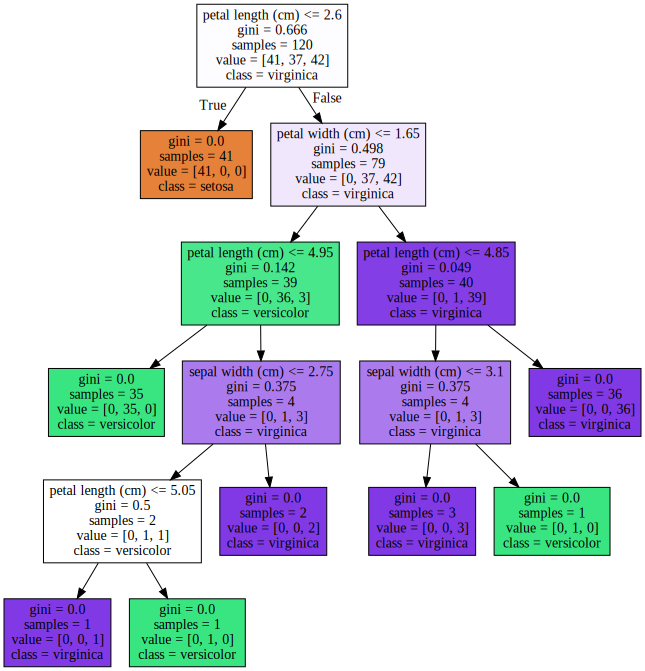

In [5]:
with open('tree.dot') as f :
    dot_graph = f.read()
graphviz.Source(dot_graph)

 가장 상단의 규칙은 'petal length'를 2.6 기준으로 나누고 있다. 전체 데이터는 120개이고 각 class 별로 41, 37, 42개의 데이터가 속해 있다. '지니계수'는 0.666으로 나와있다.
 
 해당 규칙을 기준으로 데이터를 나눈 결과 아래의 두 노드로 분할 되었는데 petal length가 2.6 이하인 데이터는 41개로 모두 class가 setosa로 분리되었다. 나머지 89개의 데이터는 'petal width'가 1.65 이하인지의 여부로 다시 나뉘어진다.
 
 이렇듯 모든 데이터가 class별로 균일하게 분류될때까지 규칙 노드를 생성하면서 트리의 깊이를 증가시킨다. 
 
 ******
이러한 이유로 결정트리는 트리의 깊이가 중요한데 트리가 깊어질수록 학습 데이터에 과대적합(overfitting)될 가능성이 있다. 과대적합이 될 경우 학습데이터에 대한 성능은 매우 우수하지만 실제로 우리가 예측을 해야할 데이터에 대한 성능은 매우 안좋아지게 된다. 그렇다면 과적합 문제가 실제로 어떻게 발생하는지 간단한 시각화를 통해 살펴보도록 하겠습니다.

우선 sklearn의 make_classfication을 활용하여 4개의 class와 2개의 feature를 가지고 있는 데이터를 생성한다. 이후 각 변수를 차원으로 설정하고 산점도를 그려 각 class별로 어떻게 분포되어 있는지 확인한다.

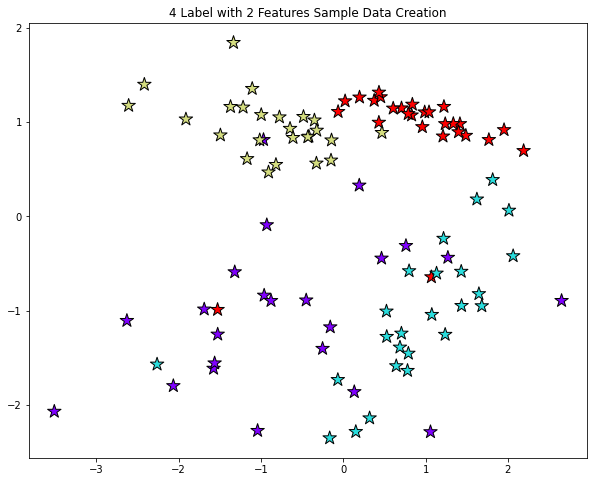

In [43]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
%matplotlib inline


# 4개의 class, 2개의 feature를 가진 데이서 생성
X, y = make_classification(n_features = 2, n_redundant = 0, n_informative = 2, n_classes = 4, n_clusters_per_class = 1, random_state = 1204)

plt.figure(figsize = (10,8))
plt.title('4 Label with 2 Features Sample Data Creation')
plt.scatter(X[:,0], X[:,1], marker = '*', c = y, s = 200, cmap = 'rainbow', edgecolor = 'k')
plt.show()

이제 결정 트리 알고리즘으로 해당 데이터를 분류해보도록 하겠습니다.

In [41]:
# Classifier의 Decision Boundary를 시각화
def visualize_boundary(model, X, y):
    plt.rcParams['figure.figsize'] = (10, 8)
    fig,ax = plt.subplots()
    
    ax.scatter(X[:, 0], X[:, 1], c=y, s=200, marker = '*', cmap='rainbow', edgecolor='k',
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim_start , xlim_end = ax.get_xlim()
    ylim_start , ylim_end = ax.get_ylim()
    
    model.fit(X, y)
    
    xx, yy = np.meshgrid(np.linspace(xlim_start,xlim_end, num=200),np.linspace(ylim_start,ylim_end, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    
    
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap='rainbow', clim=(y.min(), y.max()),
                           zorder=1)

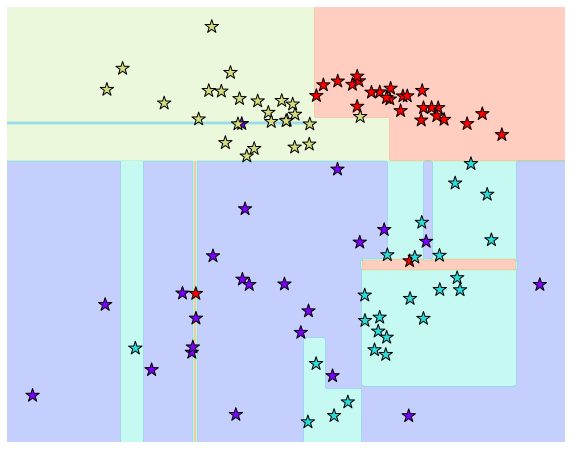

In [42]:
dt = DecisionTreeClassifier(random_state = 1204)

visualize_boundary(dt, X, y)

위의 그래프에서 볼 수 있듯이 class마다 분류를 모두 하기 위해서 분할이 자주 일어난 것을 볼 수 있습니다. 이렇게 해당 데이터만을 분할하기 위해 모델이 분류 기준을 찾게 되면 다른 데이터 즉, 새로운 데이터를 예측하기 될 때 실제 성능은 매우 떨어질 수 있습니다.

이번에는 결정트리의 하이퍼 파라미터 중 min_samples_leaf'를 6으로 설정하여 다시 한번 모델을 학습하고 시각화를 해보도록 하겠습니다.

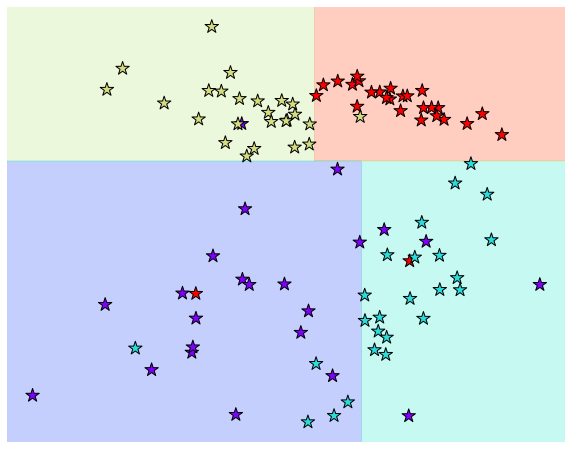

In [44]:
dt = DecisionTreeClassifier(min_samples_leaf = 6, random_state = 1204)

visualize_boundary(dt, X, y)

확실히 처음 모델 보다 데이터를 일반적으로 잘 분류하고 있는 것을 알 수 있습니다. 실제로 머신러닝 문제를 해결할 때에는 '일반화'된 모델을 구축하는 것이 실제 성능을 좌우한다고 볼 수 있습니다. 

***

지금부터는 실제 문제를 통해서 결정 트리 실습을 진행해 보도록하겠습니다. 데이터는 kaggle 데이터셋에 등록되어 있는 'Churn_Modeling' 데이터입니다.
***

우리가 예측을 해야할 변수는 'Exited' 변수로 '이탈여부'를 의미합니다. 전체적으로 쭉 진행해보도록 하겠습니다.

In [45]:
import pandas as pd

In [60]:
df = pd.read_csv("C:\\Users\\ksh\\kaggleDacon\\Kaggle\\chrun\\Churn_Modelling.csv") # 데이터 불러오기

In [61]:
df.head() # 데이터 첫 5행 확인

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [62]:
df.info() # 데이터 summary 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [65]:
df.drop(['RowNumber', 'CustomerId','Surname'], axis = 1, inplace = True) # 필요없는 컬럼 삭제

In [66]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [74]:
X = df.drop('Exited', axis = 1) # 학습 변수
y = df.Exited # 예측 변수

In [75]:
X.Gender = X.Gender.map({'Female' : 0, 'Male' : 1}) # Gender변수를 Female은 0, Male은 1로 변환

In [76]:
X = pd.get_dummies(columns = ['Geography'], data = X) # Grography 변수가 label이 3개이므로 더미 변수화

In [78]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 1204) # train, test 데이터 분할

In [79]:
dt = DecisionTreeClassifier(random_state = 1204) # 모델 호출

In [81]:
dt.fit(X_train, y_train) # 모델 학습

DecisionTreeClassifier(random_state=1204)

In [83]:
pred = dt.predict(X_test) # 검증용 데이터 예측
acc = np.round(accuracy_score(y_test, pred) * 100, 2) # 정확도 백분율로 계산
print(f'결정트리의 정확도는 {acc}%.')

결정트리의 정확도는 77.75%.


우리는 실제 머신러닝 문제를 해결할 때 하이퍼 파라미터를 변경해가면서 모델의 성능을 평가해야하는데요. 지금은 기본적인 단계이기 때문에 GridSearchCV를 통해서 최적의 파라미터를 탐색해 보도록 하겠습니다. 

GridSearchCV에 대한 설명은 google에 검색하면 쉽게 확인할 수 있으니 참고하시기 바랍니다.

In [86]:
from sklearn.model_selection import GridSearchCV

In [125]:
param = {'max_depth' : [3,4,5,6]} # 하이퍼 파라미터인 max_depth를 4가지 탐색

In [126]:
grid_dt = GridSearchCV(dt, param, scoring = 'accuracy', cv = 5) # 학습 데이터를 5개로 분할하여 5번의 자체적 학습 및 검증

In [127]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1204),
             param_grid={'max_depth': [3, 4, 5, 6]}, scoring='accuracy')

In [128]:
print(f'GridSearchCV 최고 성능은 : {np.round(grid_dt.best_score_, 6) * 100}%')
print(f'GridSearchCV 최적의 파라미터는 : {grid_dt.best_params_}')

GridSearchCV 최고 성능은 : 85.6%
GridSearchCV 최적의 파라미터는 : {'max_depth': 5}


max_depth 파라미터가 5일 때 가장 좋은 성능을 보인 것을 확인하였습니다. max_depth외에 min_samples_leaf 파라미터도 GridSearchCV를 통해 튜닝해보도록 하겠습니다.

In [129]:
param = {'max_depth' : [3,4,5,6,7], 'min_samples_leaf' : [2,4,8,16,24]} # 하이퍼 파라미터인 max_depth를 5가지 * min_samples_leaf를 5가지 총 25가지 조합 탐색

In [130]:
dt = DecisionTreeClassifier(random_state = 1204) # 모델 호출

In [131]:
grid_dt = GridSearchCV(dt, param, scoring = 'accuracy', cv = 5) # 학습 데이터를 5개로 분할하여 5번의 자체적 학습 및 검증

In [132]:
grid_dt.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1204),
             param_grid={'max_depth': [3, 4, 5, 6, 7],
                         'min_samples_leaf': [2, 4, 8, 16, 24]},
             scoring='accuracy')

In [135]:
print(f'GridSearchCV 최고 성능은 : {np.round(grid_dt.best_score_, 6) * 100}%')
print(f'GridSearchCV 최적의 파라미터는 : {grid_dt.best_params_}')

GridSearchCV 최고 성능은 : 85.65%
GridSearchCV 최적의 파라미터는 : {'max_depth': 6, 'min_samples_leaf': 24}


25가지의 파라미터 조합을 탐색해본 결과 max_depth가 6, min_samples_leaf가 24일 때 가장 좋은 성능을 보였습니다. 이제 최적의 파라미터가 세팅된 모델로 실제로 예측을 하고 정확도를 살펴보도록 하겠습니다.

In [138]:
best_dt = grid_dt.best_estimator_
pred = best_dt.predict(X_test)
acc = np.round(accuracy_score(y_test, pred) * 100, 4)
print(f'최종 결정트리 모델의 정확도 : {acc}%')

최종 결정트리 모델의 정확도 : 85.85%


최종 예측 결과 실제 검증 데이터 최고 성능 보다 뛰어난 것을 확인하였습니다. 이렇듯 머신러닝 문제는 최종적으로 모델링의 하이퍼 파라미터를 어떻게 튜닝하냐에 따라 성능이 결정되게 됩니다. 

***

추가적으로 트리 계열의 알고리즘은 '변수중요도'를 확인할 수 있습니다. 어떤 것인지 바로 살펴보도록 하겠습니다.

In [139]:
import seaborn as sns # 시각화 패키지 호출

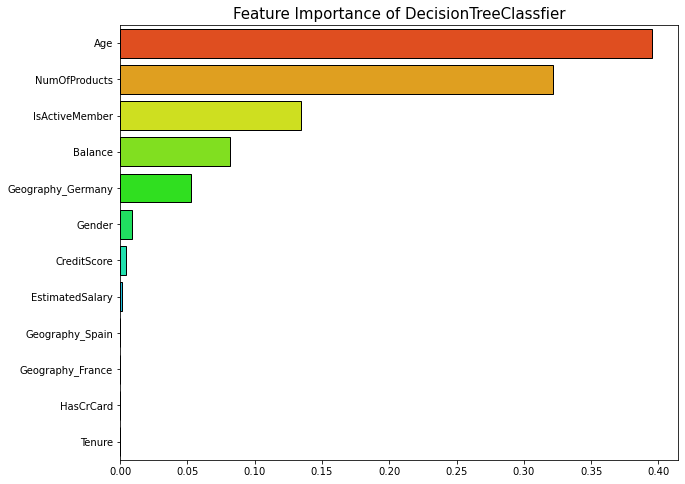

In [145]:
ft_imp = best_dt.feature_importances_ # 변수 중요도 저장
ft_imp = pd.Series(ft_imp, index = X.columns)

ft_imp_20 = ft_imp.sort_values(ascending = False)[:20]
plt.title('Feature Importance of DecisionTreeClassfier', size=  15)
sns.barplot(ft_imp_20, ft_imp_20.index, edgecolor = (0,0,0), palette = 'gist_rainbow')
plt.show()

위 그래프에서 보듯이 Age변수가 해당 모델에서 가장 중요한 변수임을 확인할 수 있습니다. 그 다음으로는 NumOfProducts로 보유 자산의 수(?)를 의미하는 것 같네요.

하지만 이러한 tree 계열의 변수중요도에는 주의할 사항이 있습니다. tree계열의 경우 범주형 변수가 가지고 있는 카테고리가 많을수록 혹은 연속형 변수의 범위가 클수록 변수중요도가 높게 측정됩니다. 즉 모델이 해당 변수를 노드 기준으로 많이 사용했을 뿐 실제로 중요하다고는 할 수 없다는 뜻입니다. 따라서 최근에는 permutation 기법을 활용해 변수 중요도를 살펴보는데 이는 나중에 구체적으로 살펴보도록 하겠습니다.

자, 지금까지 결정트리 알고리즘에 간단히 살펴본 후 실습까지 진행해 보았습니다. 다음 챕터에서는 이러한 결정트리의 단점을 보완하고 성능은 더 우수한 앙상블 학습에 대해 알아보도록 하겠습니다. 감사합니다.